# **Student Performance Indicator**


## Overview:

The Student Performance Predictor Project is centered on analyzing academic outcomes of high school students across three core subjects: Math, Reading, and Writing. The dataset provides detailed information on students’ scores alongside key demographic and socioeconomic attributes such as gender, parental education, lunch type, and test preparation participation. By examining these variables, the project aims to uncover how background factors and resources influence student achievement.

This project ultimately sheds light on how gender, socioeconomic status, parental education, and preparation shape student performance. It emphasizes the importance of equitable resource access, such as test prep programs and nutrition support, in closing achievement gaps and ensuring fair academic opportunities for all students.

### Problem statement

- In this project, I analyzed how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### Objectives

- What is the overall performance trend across Math, Reading, and Writing?

- How do gender and socioeconomic status influence student scores?

- What is the impact of parental education on academic achievement?

- How effective are test preparation courses in improving student outcomes?

### Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

---

#### Importing Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('student_performance.csv')

Checking the Top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Checking the Shape of the dataset

In [6]:
df.shape

(1000, 8)

The dataset contains 1000 student records and their corrosponding 8 features. 1000 rows and 8 columns

### Dataset Description

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### Data Cleaning and Preprocessing

- Checking Missing values
- Checking Duplicates
- Checking data type
- Checking the number of unique values of each column
- Checking statistics of data set
- Checking various categories present in the different categorical column

Checking for Missing values

In [12]:
print(df.isna().sum())

print(f"\nTotal Null Values: {df.isna().sum().sum()} in the dataset")

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Total Null Values: 0 in the dataset


There are no missing values in the data set

Checking for any Duplicated values

In [14]:
df.duplicated().sum().item(0)

0

There are no duplicates values in the data set

Checking the data types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values of each column

In [16]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Calculating the statistics summary of the numerical columns in the data set

In [18]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
- From above description of numerical data, all means are very close to each with average math_score of 66.09, reading_score of 69.17, and writing_score of 68.05
- All standard deviations are also close meaning they have same variations.
- While there is a minimum score 0 for math, but for writing minimum is 10 and reading having the higher minimum score of 17.

### Exploring Data

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Checking the unique values present in the Categorical columns

In [20]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


Identifying the numerical columns and categorical columns and printing their names

In [22]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns for `Total Score` which is the sum of math, reading, and writing score and `Average` which is average score of these 3 scores

In [24]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Calculating the number of students who scored perfectly in each of the 3 test categories.

In [25]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


Calculating the number of students who scored poorly (below 20) in each of the 3 test categories.

In [26]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values I can infer that the students have performed the worst in Maths and the best performance is in reading section

### EDA using Visualization


Visualizing the average score distribution using Histogram and Kernel Distribution Function (KDE) to make some conclusion. 

Histogram & KDE

Politing the histogram to see the distribution for the Average score and adding gender as a hue paramter to see any difference

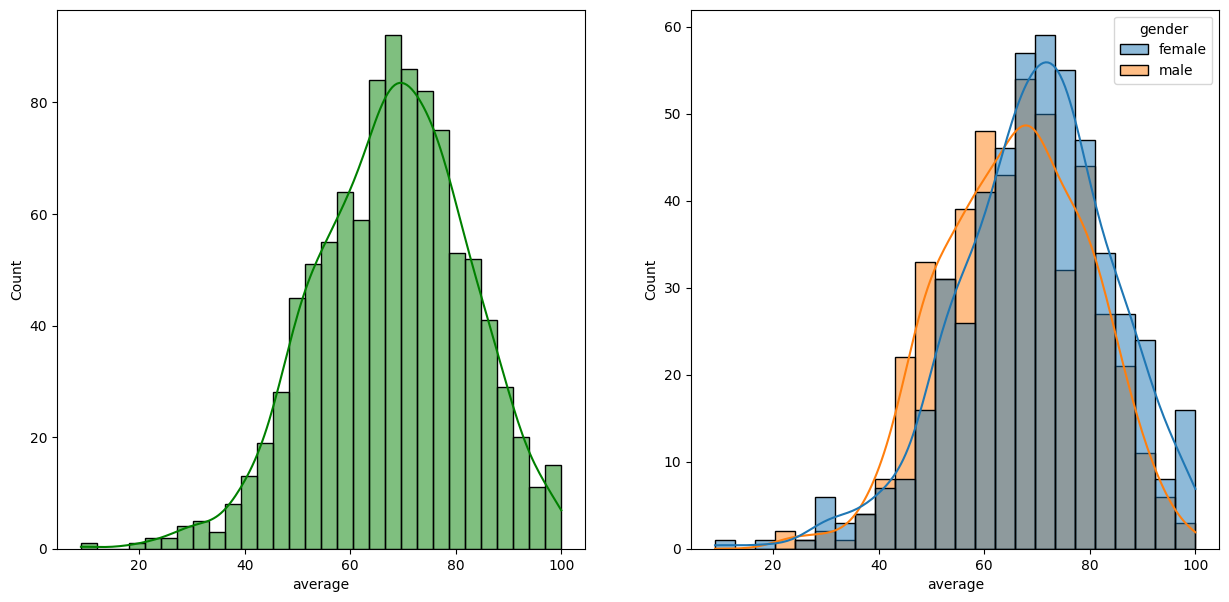

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

Politing the histogram to see the distribution for the Total score and adding gender as a hue paramter to see any difference

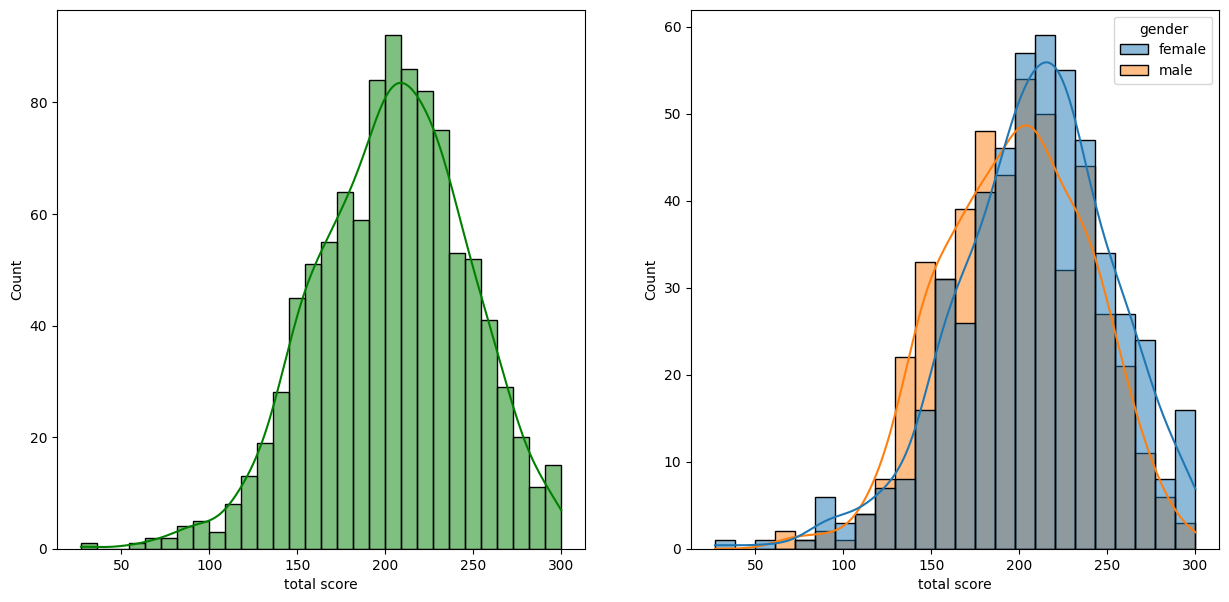

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform better than male students.

Now, plotting the histogram of the average score separately for each of the gender and adding lunch as the hue paramter to determine how getting lunch affects the average student score

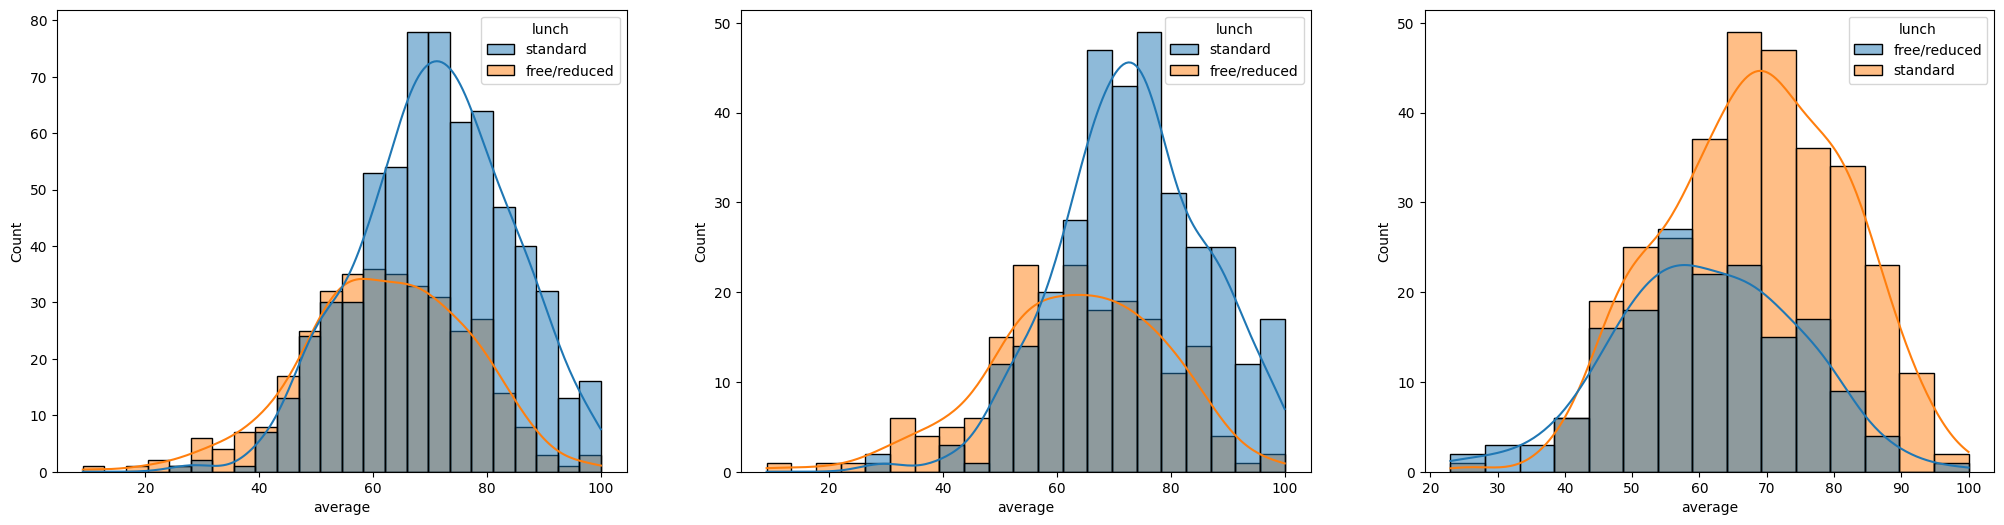

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

Creating 3 subplots to plot the distribution of average score for each gender and adding parent's education level as the hue parameter to see how parent's education affects the student performance

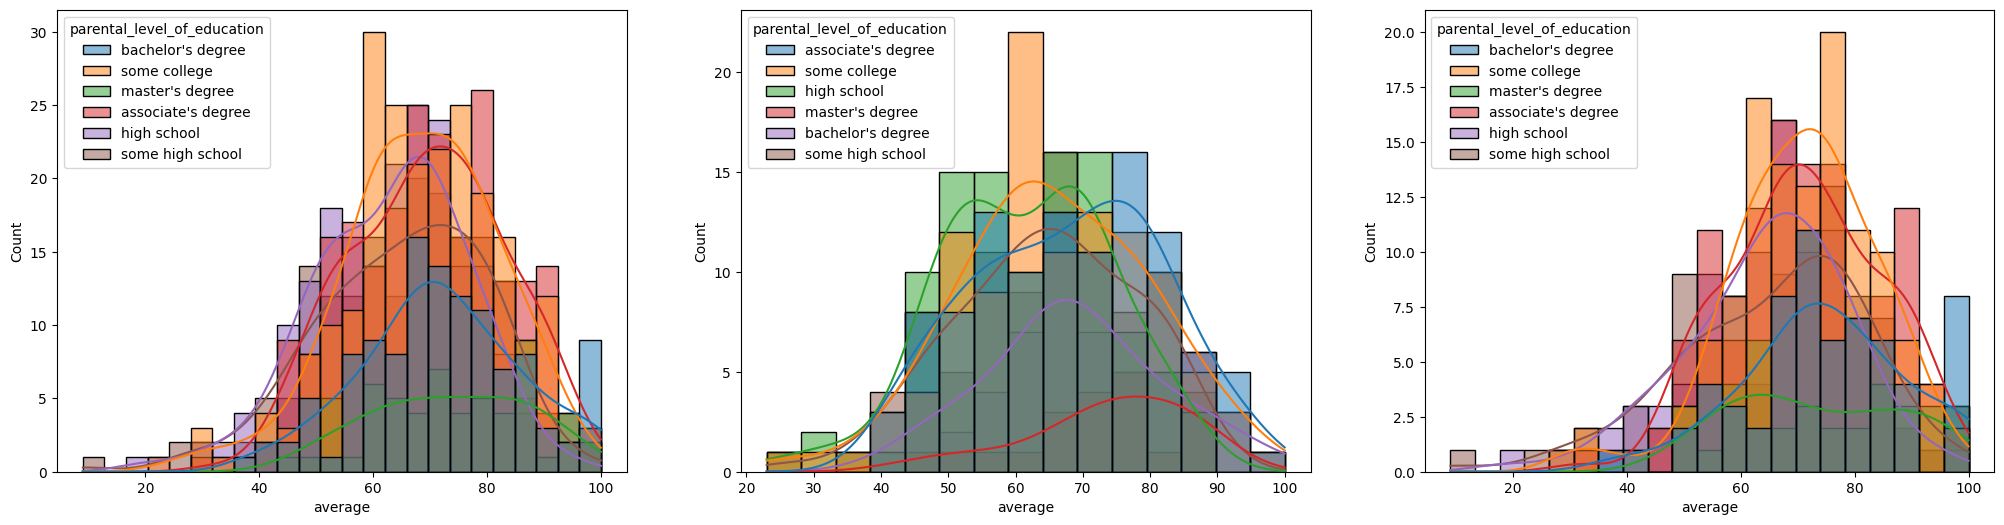

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True, hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#####  Insights
- In general, parent's education do not help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

Creating 3 subplots to plot the distribution of average score for each gender and adding race and ethinicity as the hue parameter to see how race, ethinicty, and student's background affects the student performance

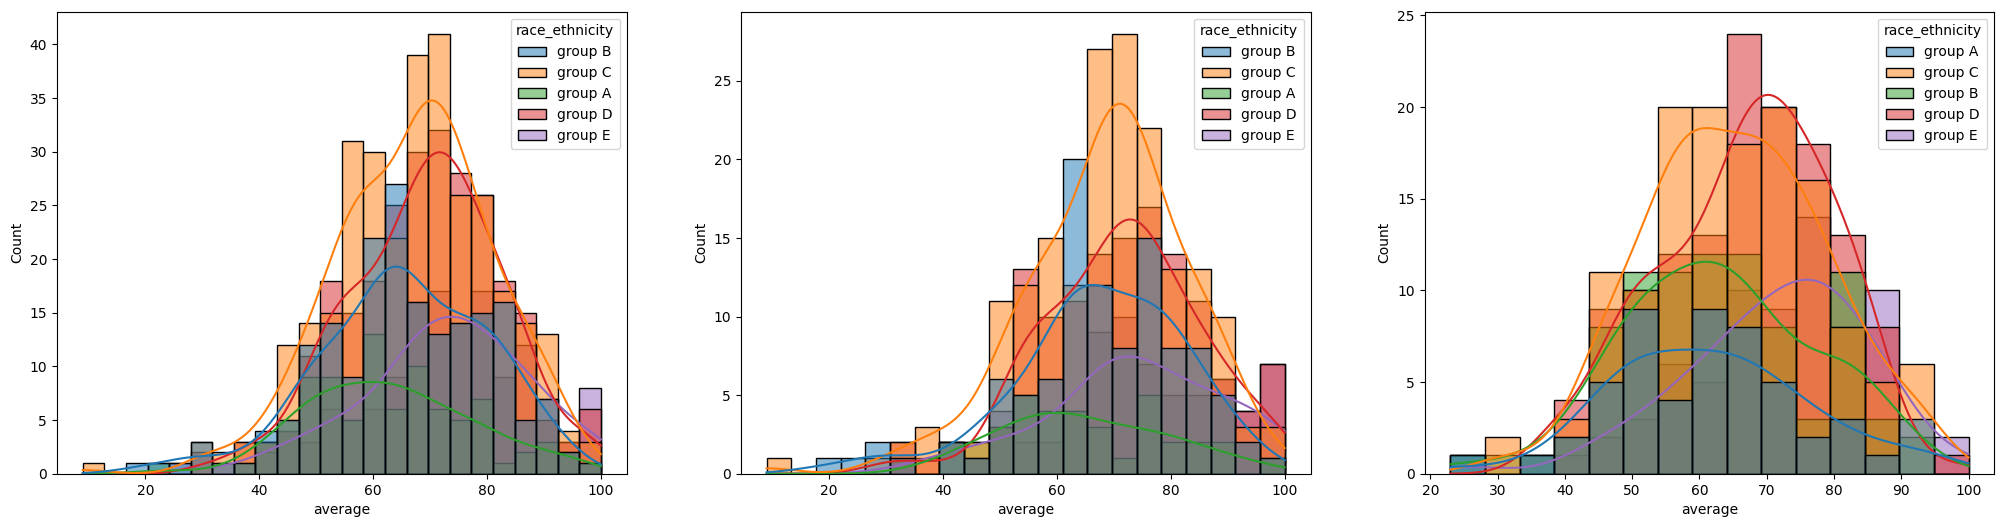

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

Ploting the violin box and whisker plot to see the distribution of score in all three subjects

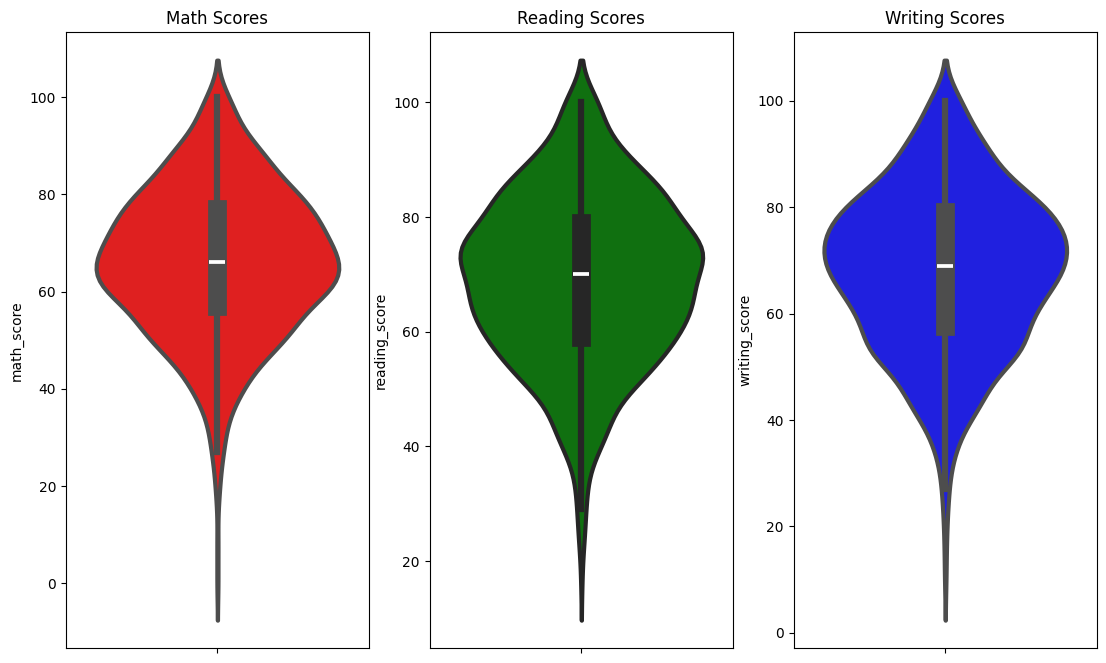

In [37]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Math Scores')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Writing Scores')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots it is clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-85

#### Checking for any Outliers

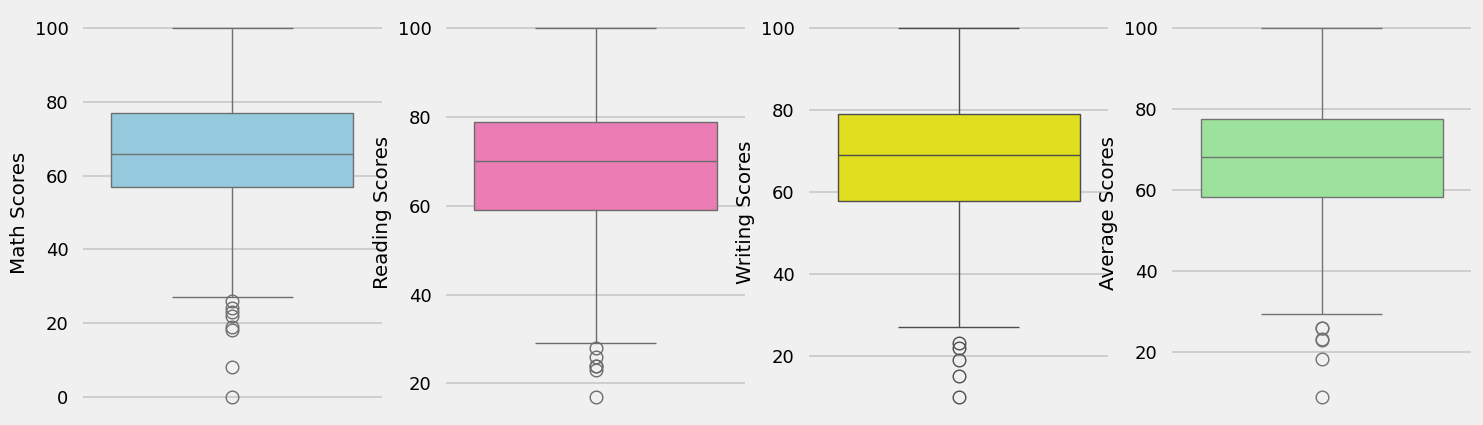

In [246]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')
plt.ylabel('Math Scores')

plt.subplot(142)
sns.boxplot(df['reading_score'], color='hotpink')
plt.ylabel('Reading Scores')

plt.subplot(143)
sns.boxplot(df['writing_score'], color='yellow')
plt.ylabel('Writing Scores')

plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')
plt.ylabel('Average Scores')
plt.tight_layout
plt.show()

Analysis using pieplot

In [41]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

In [60]:
df["gender"].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

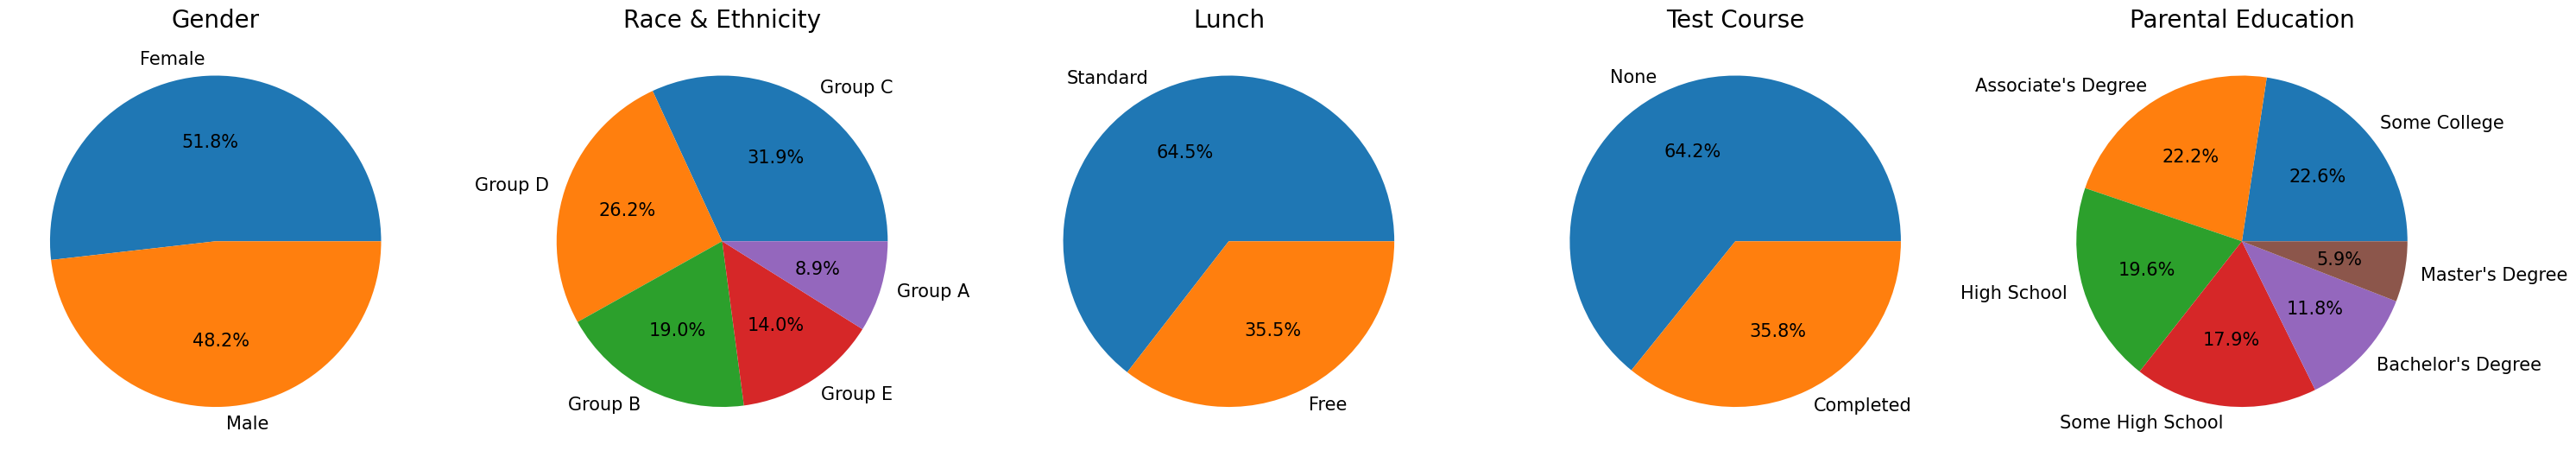

In [58]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = sns.color_palette('tab10')

plt.pie(size, colors = color, labels = labels,autopct = '%1.1f%%', textprops={'fontsize': 15})
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'


plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%', textprops={'fontsize': 15})
plt.title('Race & Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'


plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%', textprops={'fontsize': 15})
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'


plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%', textprops={'fontsize': 15})
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"


plt.pie(size, colors = color,labels = labels, autopct = '%1.1f%%', textprops={'fontsize': 15})
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal with 51.8% female and 48.2% male
- Number students are greatest in Group C with 31.9% followed by Group D with 26.1%. Group A is in the minority with just 8.9% of students.
- Number of students who have standard lunch are greater with 64.5% comapred to 35.5% students with free lunch.
- Number of students who have not enrolled in any test preparation course is greater with 64.2% and only 35.8% completing the test course
- Number of students whose parental education is "Some College" is the highest with 22.6% followed closely by "Associate's Degree" 22.2%. Master's Degree is lowest with 5.9%

### Feature Wise Visualization

#### Gender
- How is the distribution of Gender ?
- Is gender has any impact on student's performance ?

Visualizing the distribution of Gender using a pie chart. (Univariate Analysis) 

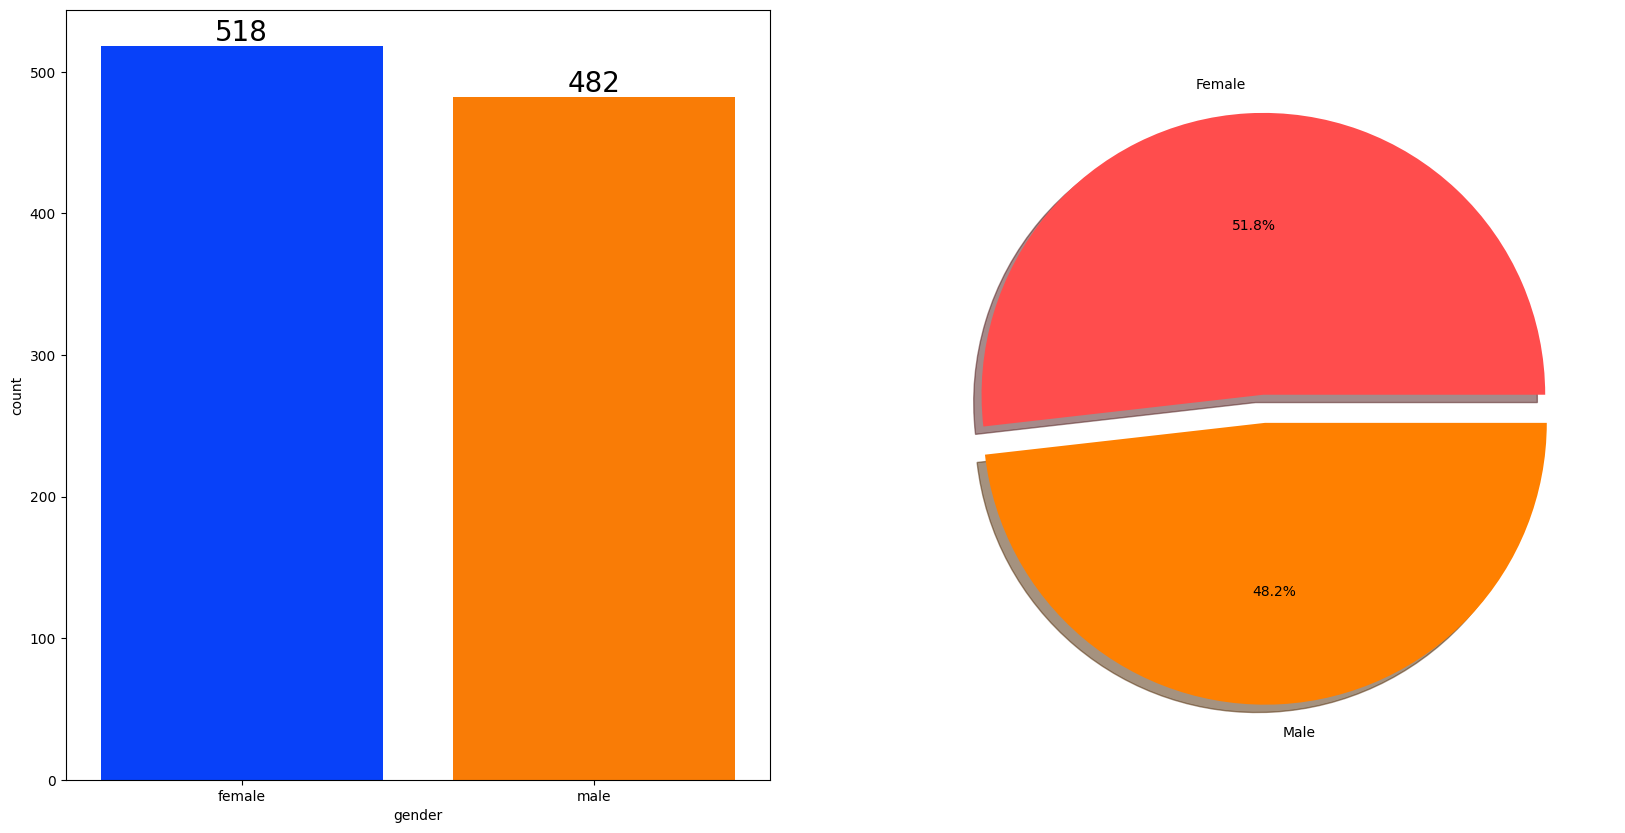

In [61]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (52%) and male students are 482 (48%) 

Analyzing whether gender has any impact on student's performance. (Bivariate Analysis) 

In [64]:
gender_group = df.groupby('gender').agg({'math_score':'mean','reading_score':'mean','writing_score':'mean','average':'mean'}).reset_index()
gender_group

,gender,math_score,reading_score,writing_score,average
0,female,63.633205,72.608108,72.467181,69.569498
1,male,68.728216,65.473029,63.311203,65.837483


Ploting a double bar graph to see how the gender affects the average score in math and total average score.

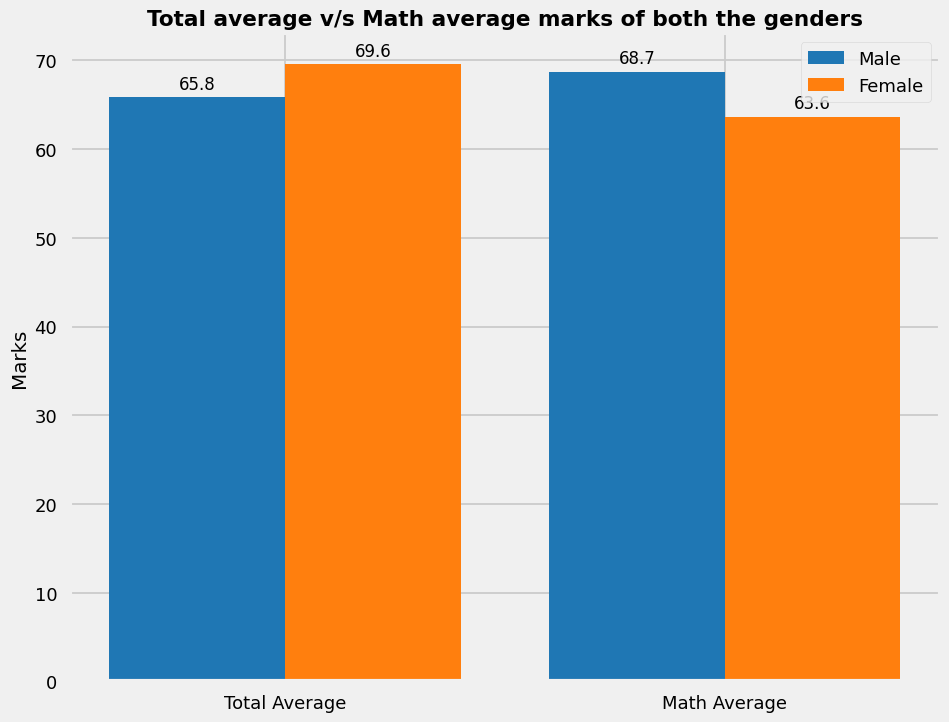

In [250]:
plt.figure(figsize=(10, 8))
color = sns.color_palette('tab10')

X = ['Total Average','Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

bars1 = plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color=color[0])
bars2 = plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color=color[1])

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()

# Add bar labels
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.1f}', 
             ha='center', va='bottom', fontsize=12)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.1f}', 
             ha='center', va='bottom', fontsize=12)

plt.show()

#### Insights 
- On an average females (69.6) have a better overall score than men (65.8), but males (68.7) have scored higher in Maths than female (63.6).

---

#### Race & Ethnicity

- Ploting the distribution of Race and Ethnicity
- Determining whether Race & Ethnicity has any impact on student's performance

Creating a sub plot of bar chart and pie chart to visualize the distribution of Race and Ethnicity (Univariate Analysis)

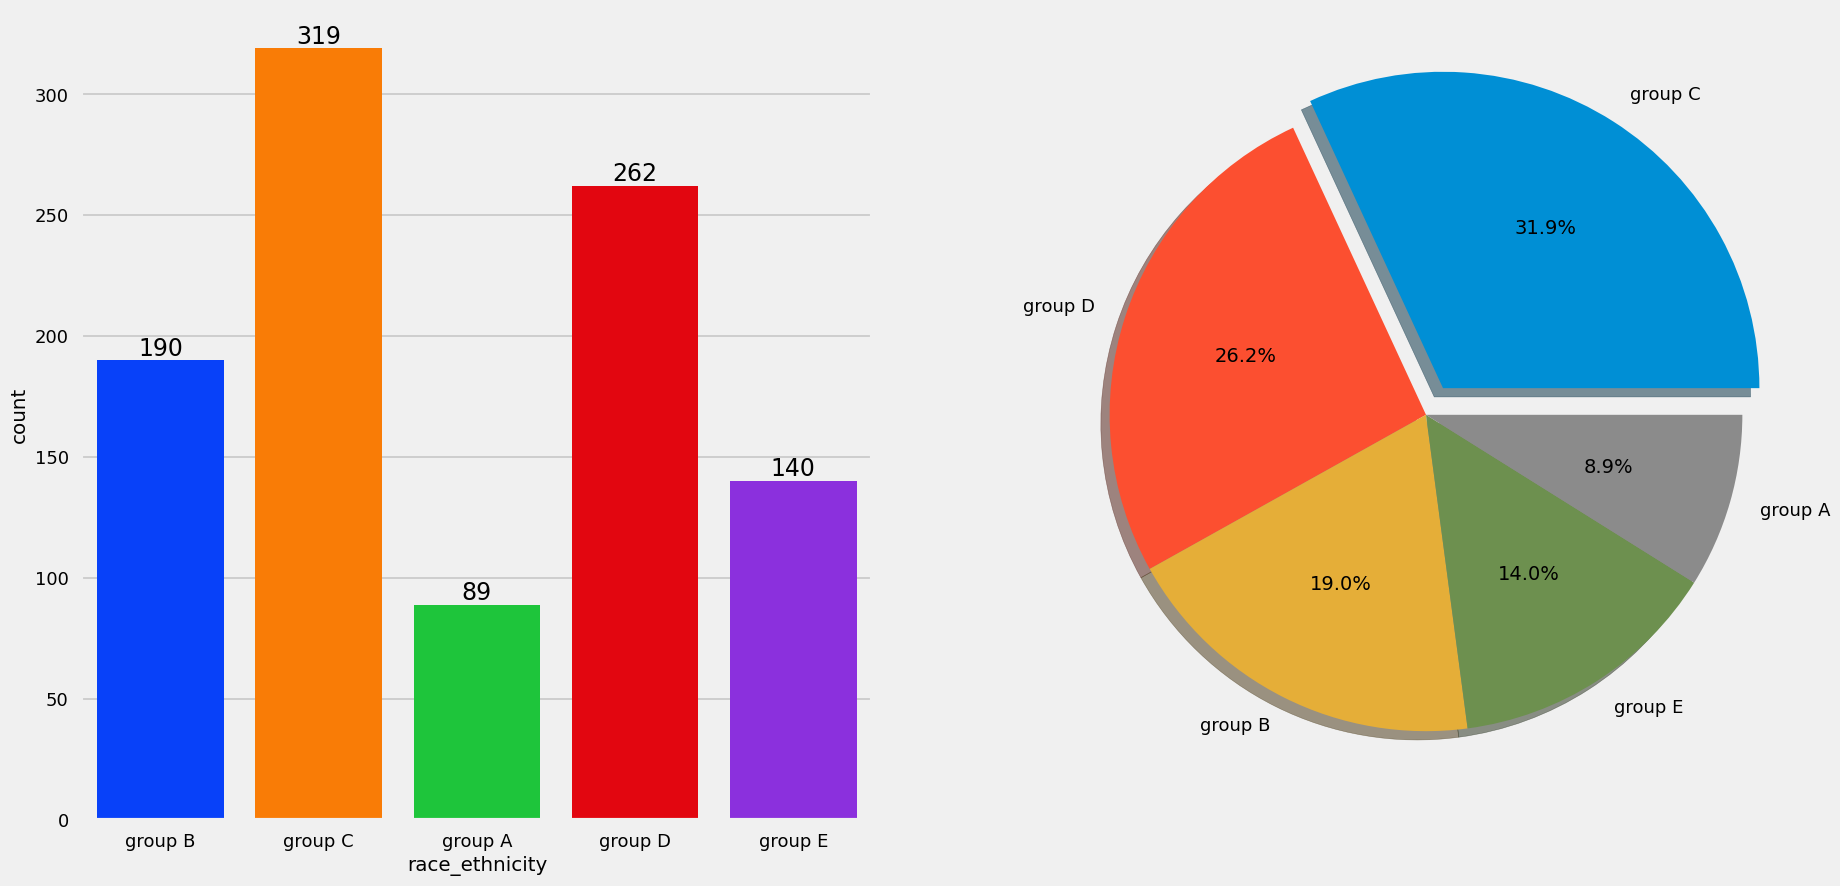

In [251]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=17)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the students are from group C with 31.9% and group D with 26.2%.
- Group A has the lowest number of students with just 8.9%.

Determining whether Race and Ethnicity has any impact on student's performance. (Bivariate Analysis)

For this, I created 3 subplots with each being a bar graph for math, reading, and writing score grouped by race and ethnicity of the students. I took the mean of the score for each of the grouped races & ethnicity to plot the bar graph.

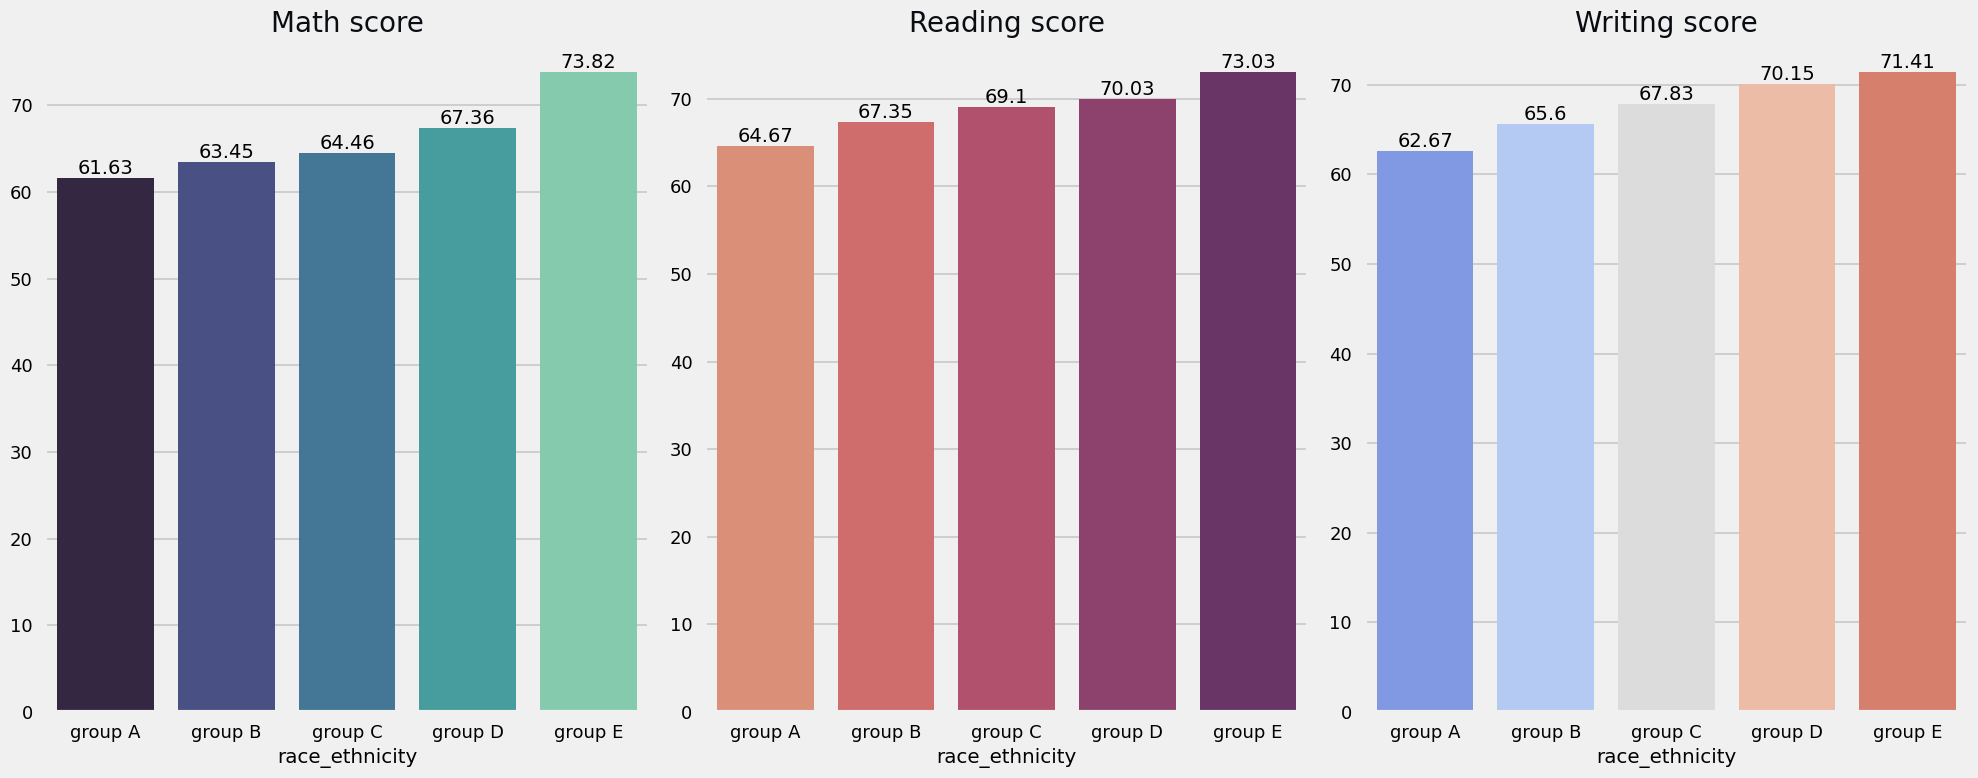

In [254]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().round(2).values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color="#0a0e13",size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=14)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().round(2).values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color="#0a0d11",size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=14)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().round(2).values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color="#080b10",size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=14)
    
plt.tight_layout()
plt.show()

#### Insights 
- Group E students have scored the highest marks for each of the category of math, reading and writing. 
- Group A students have scored the lowest marks for each subject.
- There is a same trend for each subject where students group A scoring the least, followed by B, C, D, and E being the highest for all 3 subjects. 
- This means that the students from a lower Socioeconomic status have a lower avg in all course subjects

---

#### PARENTAL LEVEL OF EDUCATION 

- Visualizing the educational background of student's parents.
- Determining whether parental education has any impact on student's performance.

Creating a horizontal countplot to visualize the number of students with different parental education levels.

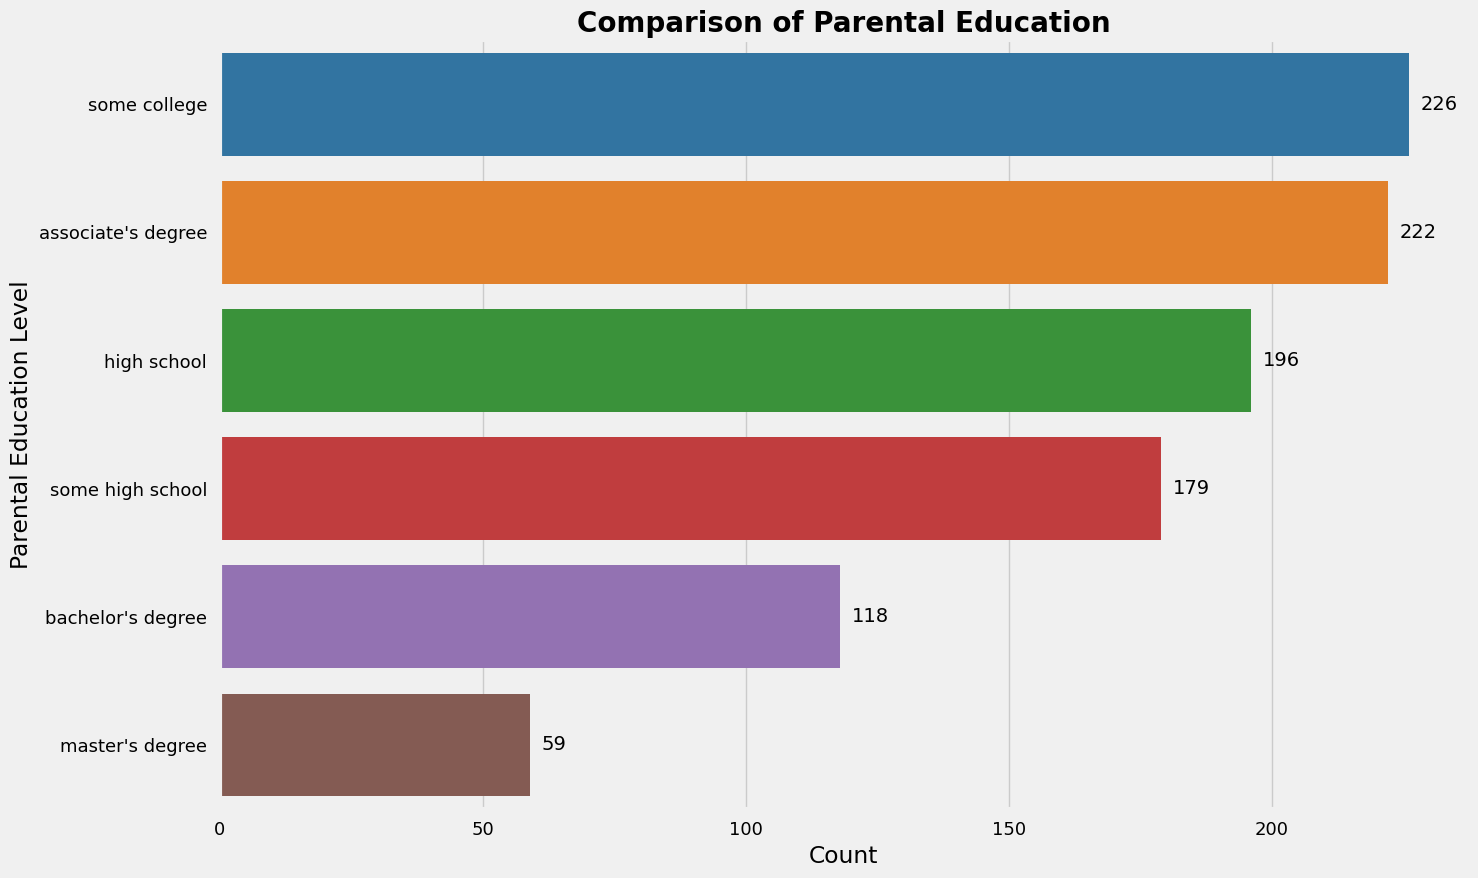

In [255]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

ax = sns.countplot(
    y=df['parental_level_of_education'],
    order=df["parental_level_of_education"].value_counts(ascending=False).index,
    palette='tab10')

counts = df["parental_level_of_education"].value_counts(ascending=False)
for i, (category, count) in enumerate(counts.items()):
    ax.text(count + max(counts) * 0.01, i, str(count), 
            va='center', ha='left', fontsize=14, color='black')

plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Count')
plt.ylabel('Parental Education Level')
plt.tight_layout()
plt.show()

#### Insights 
- Parental education of some college is the highest for 226 students, followed by associate's degree with 222.
- Parental education of master's degree is the lowest with only 59 students.

Determining whether parental education has any impact on student's performance. 

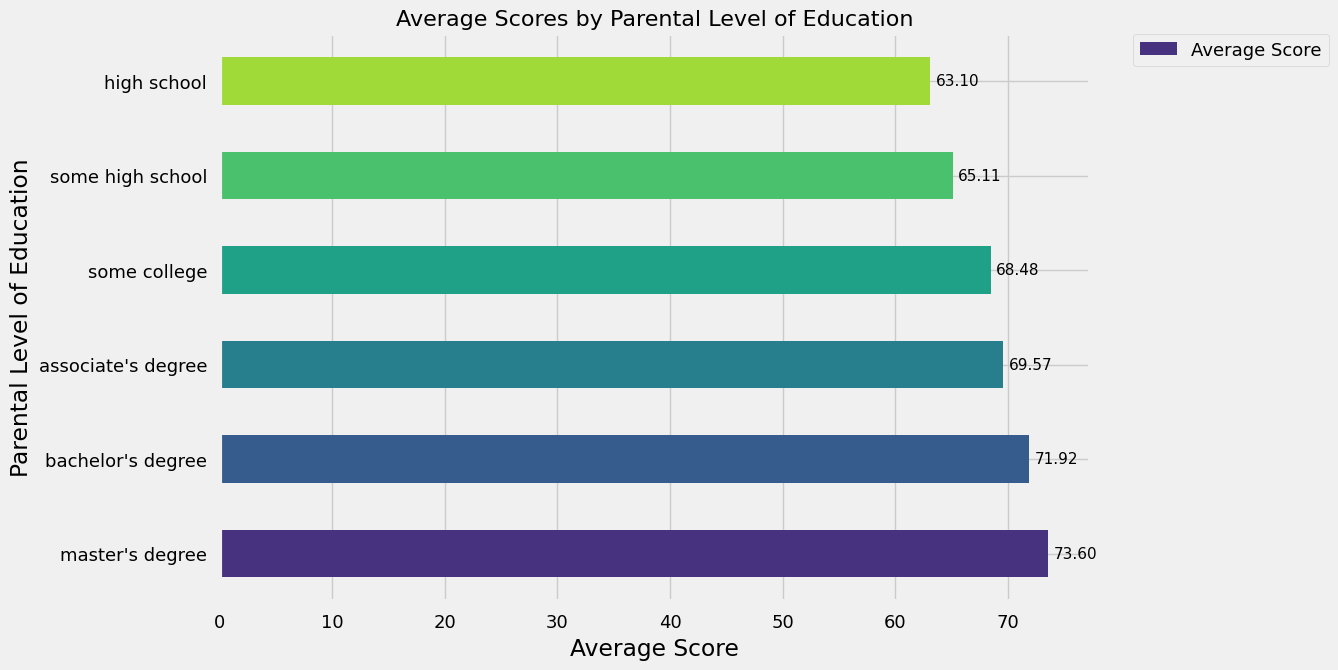

In [256]:
avg_scores = df.groupby('parental_level_of_education')['average'].mean().sort_values(ascending=False)
colors = sns.color_palette('viridis', len(avg_scores))
ax = avg_scores.plot(kind='barh', figsize=(10,7), color=colors)
plt.legend(['Average Score'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

for i, (value) in enumerate(avg_scores):
    ax.text(value + 0.5, i, f"{value:.2f}", va='center', ha='left', fontsize=11, color='black')

plt.xlabel('Average Score')
plt.ylabel('Parental Level of Education')
plt.title('Average Scores by Parental Level of Education', fontsize=16)
plt.show();

In [123]:
for edu_level, numeric_value in education_mapping.items():
    avg_score = avg_scores_by_education[avg_scores_by_education['education_numeric'] == numeric_value]['average'].iloc[0]
    print(f"{numeric_value}: {edu_level} → Average Score: {avg_score:.2f}")

1: some high school → Average Score: 65.11
2: high school → Average Score: 63.10
3: some college → Average Score: 68.48
4: associate's degree → Average Score: 69.57
5: bachelor's degree → Average Score: 71.92
6: master's degree → Average Score: 73.60


#### Insights 

- There is an clear positive association between the parental education level and student's performance in core subjects. 
- The score of student whose parents possess master and bachelor level education are higher than others with 73.6 and 71.9 average scores respectively.
- As the education level of parents from just high school increases to master's degree, the average student score also increases.

Creating a scatter plot by mapping the education levels using ordinal encoding and the average score for each category. Then, I also fitted a linear regression line to see if there is an linear association and also calculated the correlation coefficient to determine the strength of this positive association. I also calculated a p-value to determine the statistical significance.

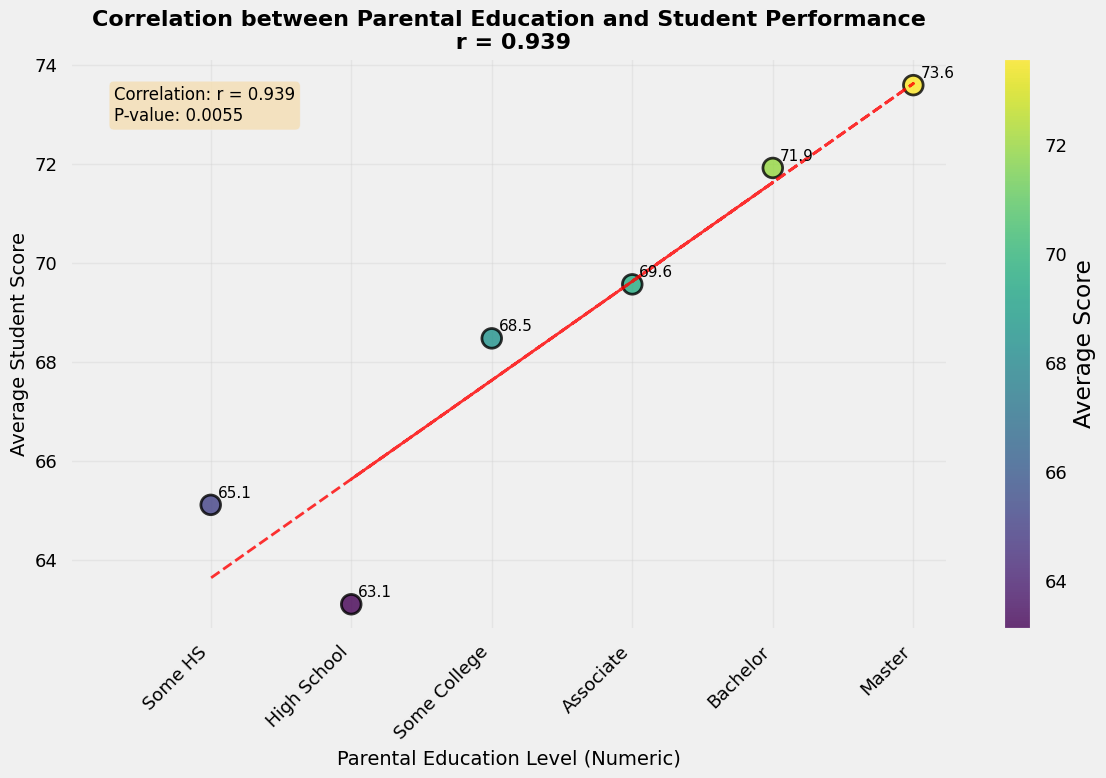



Correlation Coefficient (r): 0.9389
P-value: 0.005479
R-squared: 0.8816
Correlation Strength: Strong Positive
Result is Statistically significant (p < 0.05)


In [260]:
# Create a mapping for education levels (ordinal encoding)
from scipy.stats import pearsonr

education_mapping = {
    'some high school': 1,
    'high school': 2,
    'some college': 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

# Apply the mapping
df['education_numeric'] = df['parental_level_of_education'].map(education_mapping)

avg_scores_by_education = df.groupby(['parental_level_of_education', 'education_numeric'])['average'].mean().reset_index()

x_values = avg_scores_by_education['education_numeric']
y_values = avg_scores_by_education['average']

# Calculating correlation coefficient
correlation_coeff, p_value = pearsonr(x_values, y_values)

plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')

scatter = plt.scatter(x_values, y_values, 
                     c=y_values, cmap='viridis', 
                     s=200, alpha=0.8, edgecolors='black', linewidth=2)

# Adding a trend line
z = np.polyfit(x_values, y_values, 1)
p = np.poly1d(z)
plt.plot(x_values, p(x_values), "r--", alpha=0.8, linewidth=2, label=f'Trend Line')

# Customizing the plot
plt.xlabel('Parental Education Level (Numeric)', fontsize=14)
plt.ylabel('Average Student Score', fontsize=14)
plt.title(f'Correlation between Parental Education and Student Performance\n r = {correlation_coeff:.3f}', 
          fontsize=16, fontweight='bold')

education_labels = ['', 'Some HS', 'High School', 'Some College', 'Associate', 'Bachelor', 'Master']
plt.xticks(range(7), education_labels, rotation=45, ha='right')

plt.text(0.05, 0.95, f'Correlation: r = {correlation_coeff:.3f}\nP-value: {p_value:.4f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         verticalalignment='top')

# Adding data point labels
for i, (x, y, edu_level) in enumerate(zip(x_values, y_values, avg_scores_by_education['parental_level_of_education'])):
    plt.annotate(f'{y:.1f}', (x, y), xytext=(5, 5), textcoords='offset points', 
                fontsize=11, ha='left')

plt.colorbar(scatter, label='Average Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n")
print(f"Correlation Coefficient (r): {correlation_coeff:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"R-squared: {correlation_coeff**2:.4f}")

# Interpreting the correlation strength
if abs(correlation_coeff) >= 0.7:
    strength = "Strong"
elif abs(correlation_coeff) >= 0.5:
    strength = "Moderate"
elif abs(correlation_coeff) >= 0.3:
    strength = "Weak"
else:
    strength = "Very Weak"

direction = "Positive" if correlation_coeff > 0 else "Negative"
print(f"Correlation Strength: {strength} {direction}")

if p_value < 0.05:
    print("Result is Statistically significant (p < 0.05)")
else:
    print("Result is Not statistically significant (p ≥ 0.05)")

Plotting the scatter plot now for all students within each parental education group level. I also calculated the correlation coefficient and the p-value to determine the significance.

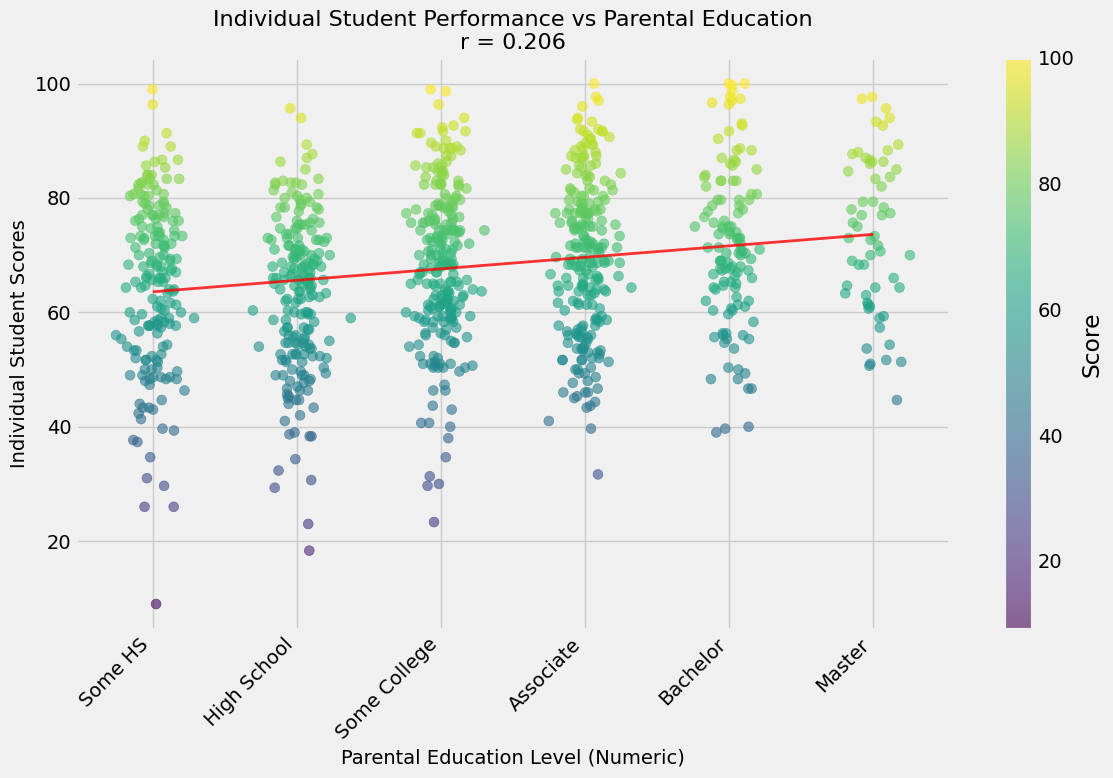

Individual Data Correlation: r = 0.2058, p = 0.000000


In [ ]:
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')

# Adding some jitter to avoid overlapping points
jitter = 0.1
x_jittered = df['education_numeric'] + np.random.normal(0, jitter, len(df))

scatter = plt.scatter(x_jittered, df['average'], 
                     alpha=0.6, s=50, c=df['average'], cmap='viridis')

# Calculating correlation for all individual points
correlation_individual, p_val_individual = pearsonr(df['education_numeric'], df['average'])

# Adding trend line
z = np.polyfit(df['education_numeric'], df['average'], 1)
p = np.poly1d(z)
plt.plot(sorted(df['education_numeric'].unique()), 
         p(sorted(df['education_numeric'].unique())), 
         "r-", alpha=0.8, linewidth=2)

plt.xlabel('Parental Education Level (Numeric)', fontsize=14)
plt.ylabel('Individual Student Scores', fontsize=14)
plt.title(f'Individual Student Performance vs Parental Education\nr = {correlation_individual:.3f}', fontsize=16)
plt.xticks(range(1, 7), ['Some HS', 'High School', 'Some College', 'Associate', 'Bachelor', 'Master'], 
           rotation=45, ha='right')
plt.colorbar(scatter, label='Score')
plt.tight_layout()
plt.show()

print(f"Individual Data Correlation: r = {correlation_individual:.4f}, p = {p_val_individual:.6f}")


#### Insights:

- The analysis shows a strong positive correlation (r = 0.939) between parental education levels and average student performance when examining group means. This relationship is statistically significant (p < 0.05) and explains 88.2% of the variance in average scores across education groups.
- However, when examining individual student data, the correlation weakens substantially to r = 0.206, indicating a weak positive association. While still statistically significant (p < 0.05), this suggests considerable variation exists within each parental education group with many students exceed or fall below their group's average performance.

---

#### Lunch  
- Visualizing the most common lunch type among the students
- Determining the effect of lunch on the test scores


Creating a horizontal bar chart to visualize the number of students receiving specific types of lunch.

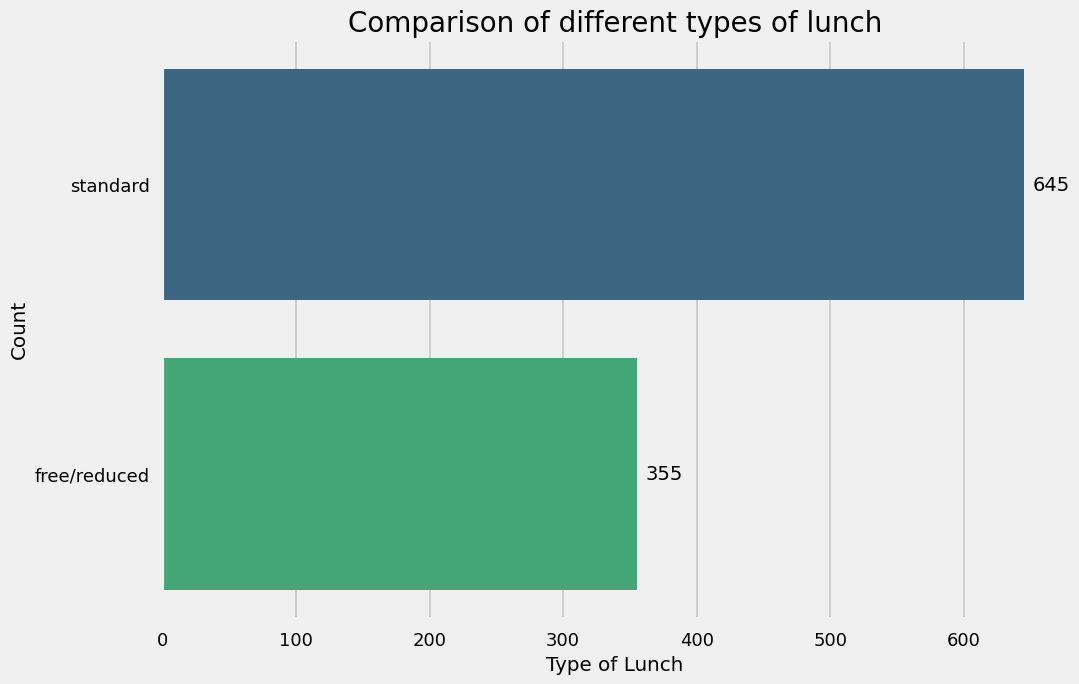

In [261]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')
ax= sns.countplot(df['lunch'], palette = "viridis")
counts = df["lunch"].value_counts()
for i, (category, count) in enumerate(counts.items()):
    ax.text(count + max(counts) * 0.01, i, str(count), 
            va='center', ha='left', fontsize=14, color='black')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Type of Lunch')
plt.ylabel('Count')
plt.show()

#### Insights 

- Standard lunch is the majority lunch given to 645 students compared to free/reduced lunch given to 355 students.

Determining whether the type of lunch intake affects the student's performance on test scores.

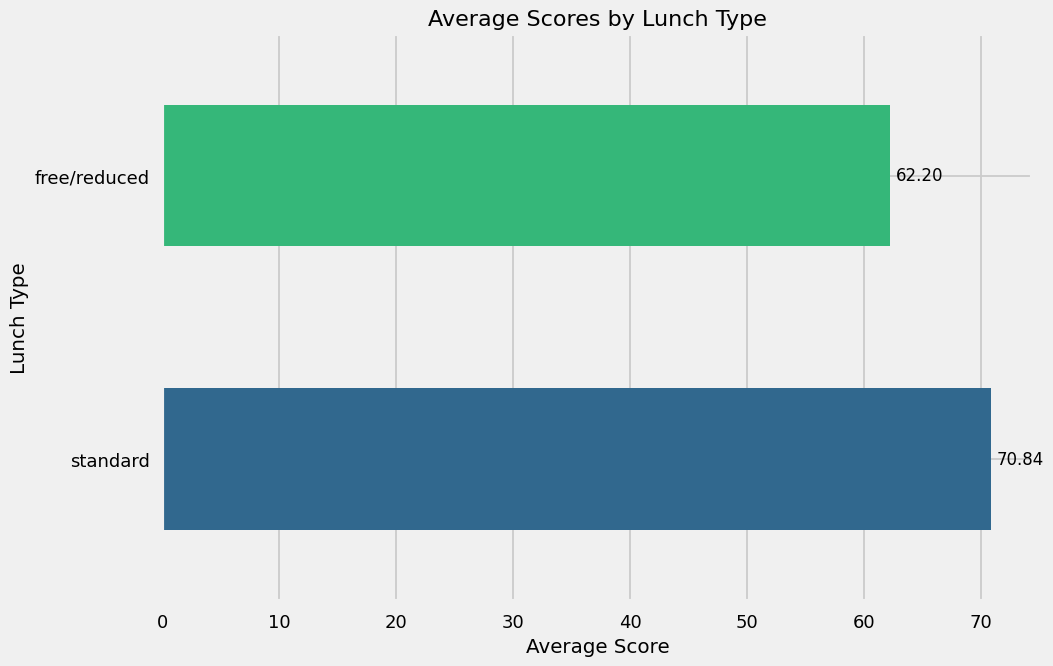

In [147]:
avg_scores = df.groupby('lunch')['average'].mean().sort_values(ascending=False)
colors = sns.color_palette('viridis', len(avg_scores))
ax = avg_scores.plot(kind='barh', figsize=(10,7), color=colors)

for i, (value) in enumerate(avg_scores):
    ax.text(value + 0.5, i, f"{value:.2f}", va='center', ha='left', fontsize=12, color='black')

plt.xlabel('Average Score')
plt.ylabel('Lunch Type')
plt.title('Average Scores by Lunch Type', fontsize=16)
plt.show();

#### Insights 

- Students who get Standard Lunch (average score 70.84) tend to perform better than students who got free/reduced lunch (average score 62.2)

---

#### Test Preparation Course
- Checking how many students have completed the test prep course
- Determining whether test prep course has any impact on the student's performace on test scores

Visualzing the number of students who have completed the test prep course using count plot

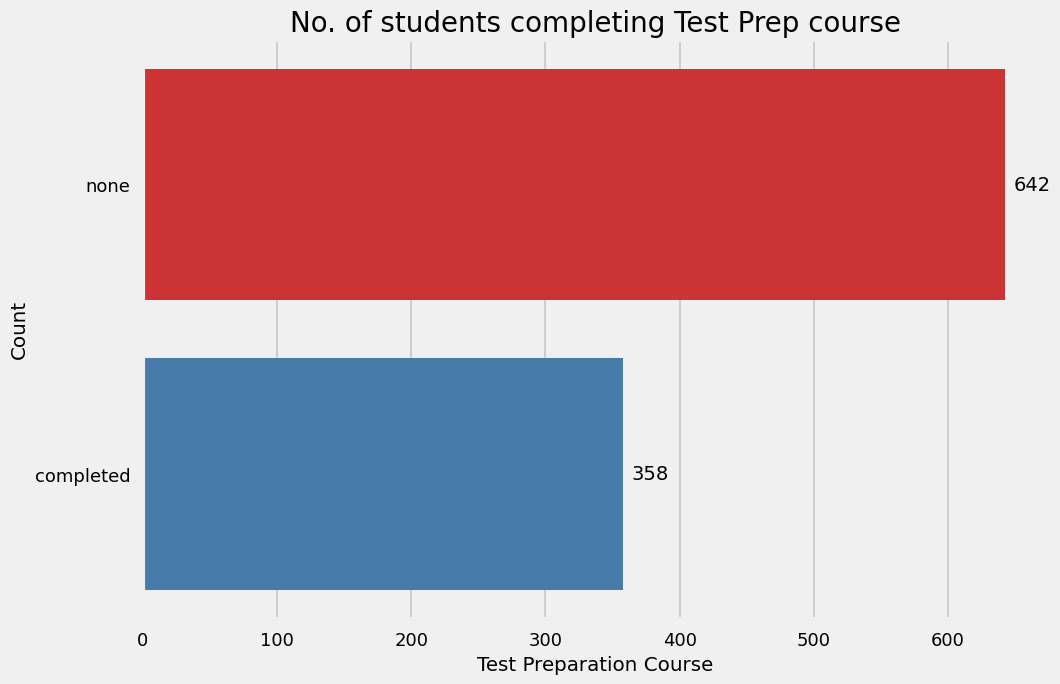

In [262]:
plt.style.use('seaborn-v0_8-talk')
ax= sns.countplot(df['test_preparation_course'], palette = "Set1")
counts = df['test_preparation_course'].value_counts()
for i, (category, count) in enumerate(counts.items()):
    ax.text(count + max(counts) * 0.01, i, str(count), 
            va='center', ha='left', fontsize=14, color='black')
plt.title('No. of students completing Test Prep course', fontweight = 30, fontsize = 20)
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')
plt.show()

#### Insights:

- The number is students who have completed the test prep course (642) is much larger than the students who have not (358).

Determining whether taking the test prep course has any impact on the student's performance.

Creating a bar plot to visualize the average score for the students grouped by the test prep courses.

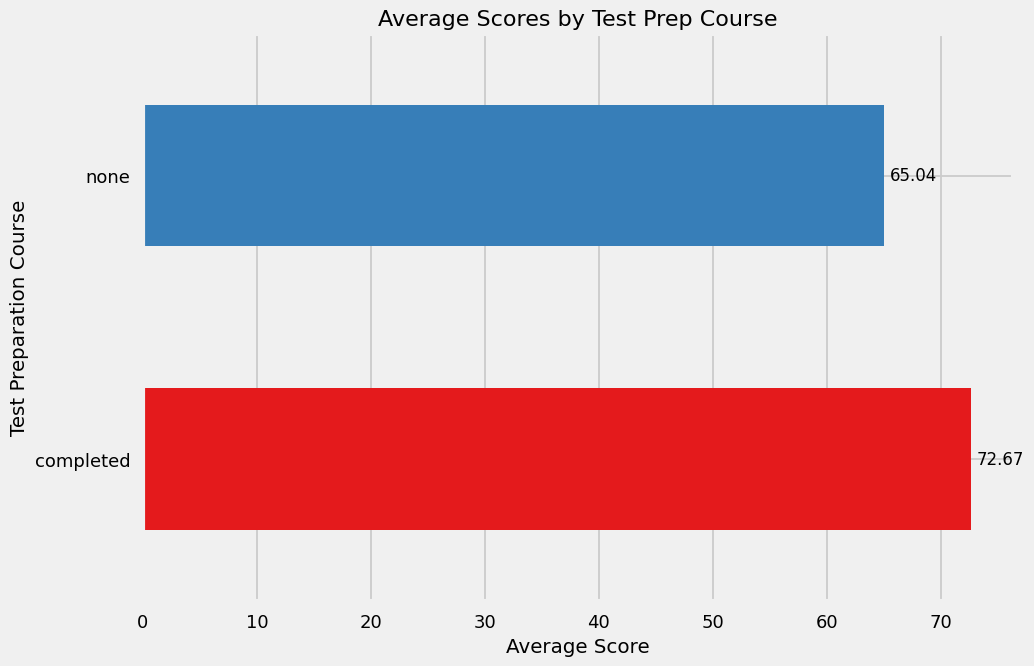

In [164]:
avg_scores = df.groupby('test_preparation_course')['average'].mean().sort_values(ascending=False)
colors = sns.color_palette('Set1', len(avg_scores))
ax = avg_scores.plot(kind='barh', figsize=(10,7), color=colors)

for i, (value) in enumerate(avg_scores):
    ax.text(value + 0.5, i, f"{value:.2f}", va='center', ha='left', fontsize=12, color='black')

plt.xlabel('Average Score')
plt.ylabel('Test Preparation Course')
plt.title('Average Scores by Test Prep Course', fontsize=16)
plt.show();

#### Insights:

- Students who have taken the test preparation course (72.67) perform much better than the students who have not taken (65.04) 

Creating a subplot but now to see the average score for each of the 3 academic subjects and analyze how test preparation course prepares students for all 3 subjects and has impact on the test scores.

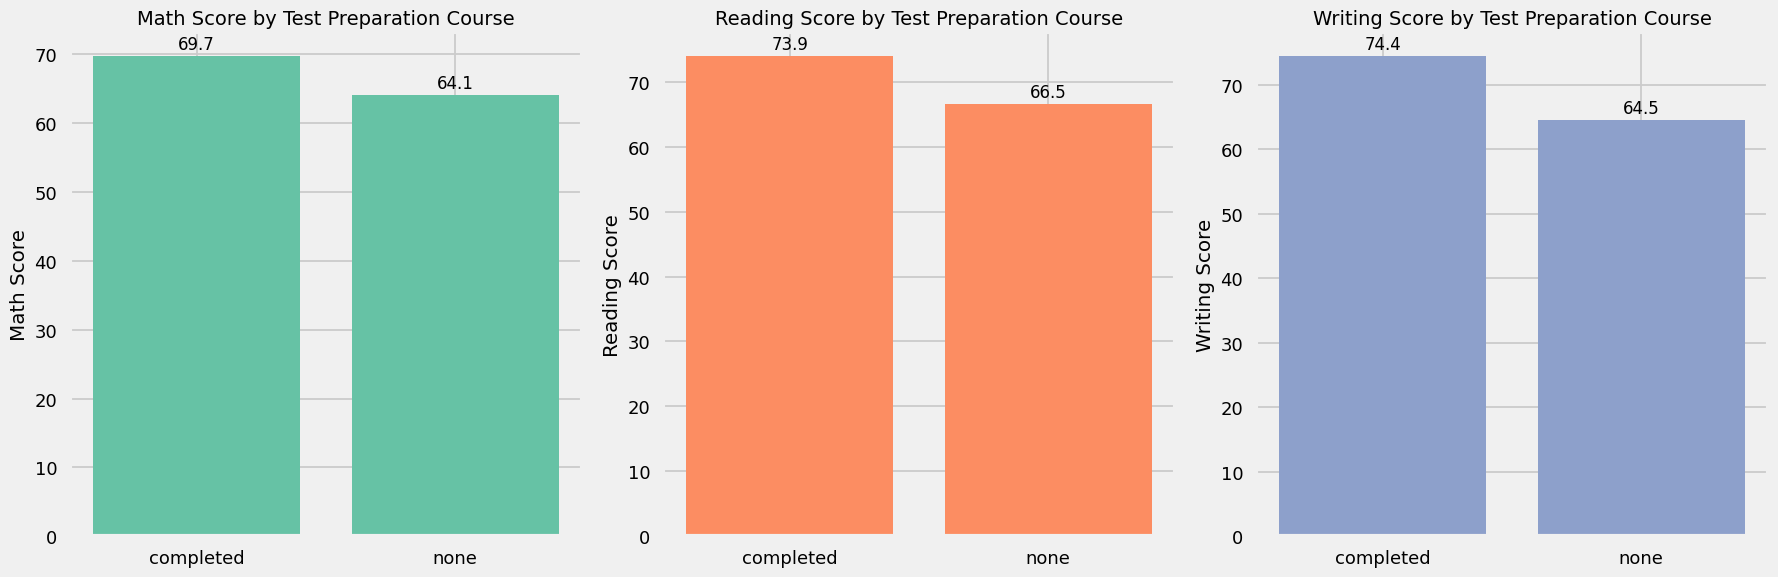

In [193]:
f, ax = plt.subplots(1, 3, figsize=(18, 6))
color_palette = sns.color_palette('Set2')

mean_scores = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean()

ax[0].bar(mean_scores.index, mean_scores['math_score'], color=color_palette[0])
for i, (value) in enumerate(mean_scores['math_score']):
    ax[0].text(i, value + 0.5, f"{value:.1f}", ha='center', va='bottom', fontsize=12, color='black')
ax[0].set_title('Math Score by Test Preparation Course', fontsize=14)
ax[0].set_ylabel('Math Score')

ax[1].bar(mean_scores.index, mean_scores['reading_score'], color=color_palette[1])
for i, (value) in enumerate(mean_scores['reading_score']):
    ax[1].text(i, value + 0.5, f"{value:.1f}", ha='center', va='bottom', fontsize=12, color='black')
ax[1].set_title('Reading Score by Test Preparation Course', fontsize=14)
ax[1].set_ylabel('Reading Score')

ax[2].bar(mean_scores.index, mean_scores['writing_score'], color=color_palette[2])
for i, (value) in enumerate(mean_scores['writing_score']):
    ax[2].text(i, value + 0.5, f"{value:.1f}", ha='center', va='bottom', fontsize=12, color='black')
ax[2].set_title('Writing Score by Test Preparation Course', fontsize=14)
ax[2].set_ylabel('Writing Score')

plt.tight_layout()
plt.show()

#### Insights:

- The graphs shows that test preparation courses provide substantial and consistent improvements across all academic subjects, with students who completed the course significantly outperforming their unprepared peers.

- Writing scores show the largest improvement (+9.9 points): 74.4 vs. 64.5
- Reading scores demonstrate strong gains (+7.4 points): 73.9 vs. 66.5
- Math scores show moderate improvement (+5.6 points): 69.7 vs. 64.1

- From the previous graph, students who completed test preparation courses achieved an average score of 72.67 compared to 65.04 for unprepared students which is a 7.63 point advantage overall. This 11.7% improvement translates to meaningful academic advantage.

Creating a similar subplot bar graphs with lunch and average score for each academic subject and adding the test prep course as a hue parameter to see whether both lunch and test prep course have correlation with test scores for each subject.

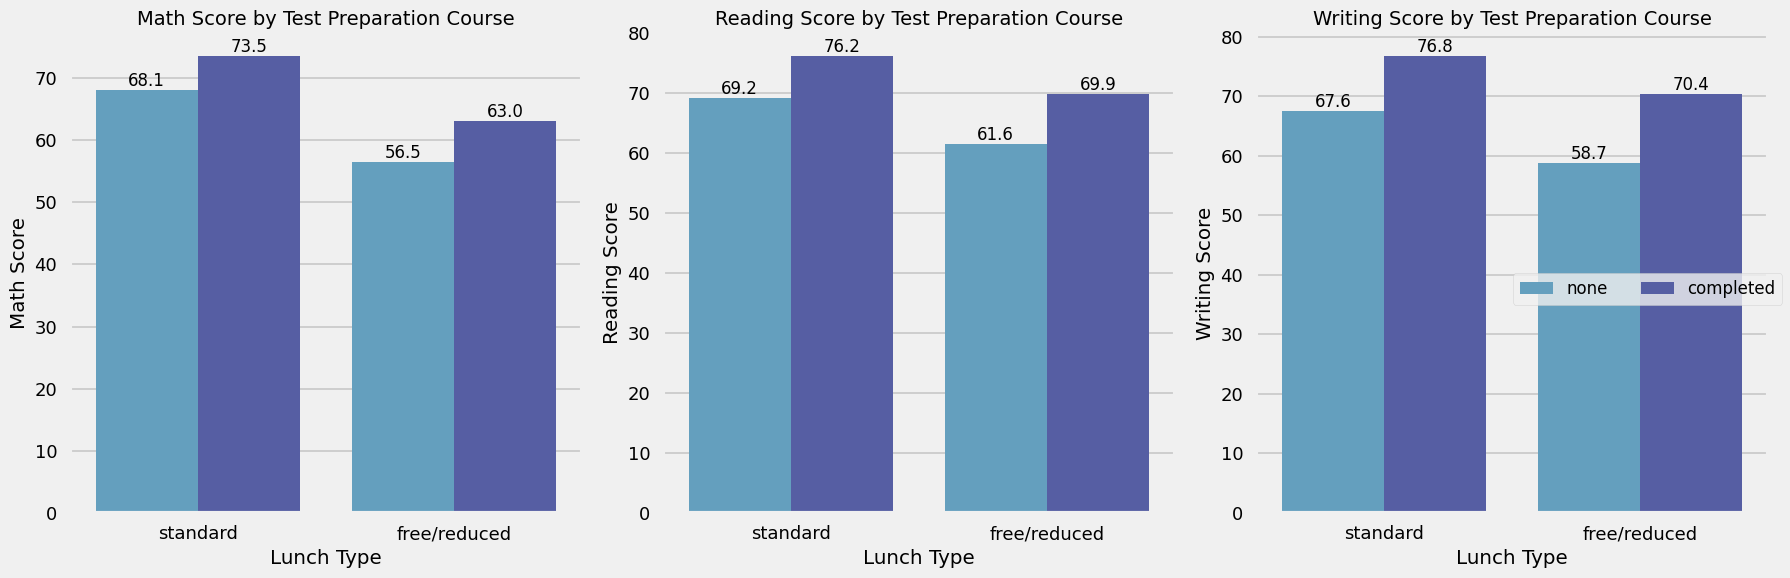

In [214]:
f, ax = plt.subplots(1, 3, figsize=(18, 6))
color_palette = sns.color_palette('icefire')

sns.barplot(data=df,
    x='lunch',
    y='math_score',
    hue='test_preparation_course',
    ax=ax[0],
    palette=color_palette, ci=None)
ax[0].set_title('Math Score by Test Preparation Course', fontsize=14)
ax[0].set_ylabel('Math Score')
ax[0].set_xlabel('Lunch Type')
for container in ax[0].containers:
    ax[0].bar_label(container, fmt="%.1f", fontsize=12, color='black')
ax[0].legend_.remove()  

sns.barplot(data=df,
    x='lunch',
    y='reading_score',
    hue='test_preparation_course',
    ax=ax[1],
    palette=color_palette, ci=None)
ax[1].set_title('Reading Score by Test Preparation Course', fontsize=14)
ax[1].set_ylabel('Reading Score')
ax[1].set_xlabel('Lunch Type')
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%.1f", fontsize=12, color='black')
ax[1].legend_.remove() 

sns.barplot(data=df,
    x='lunch',
    y='writing_score',
    hue='test_preparation_course',
    ax=ax[2],
    palette=color_palette, ci=None)
ax[2].set_title('Writing Score by Test Preparation Course', fontsize=14)
ax[2].set_ylabel('Writing Score')
ax[2].set_xlabel('Lunch Type')
for container in ax[2].containers:
    ax[2].bar_label(container, fmt="%.1f", fontsize=12, color='black')
    
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend_.remove()  

f.legend(handles, labels, loc='center right', ncol=2, fontsize=12)

plt.tight_layout()
plt.show()

#### Insights:

- The graph shows that test preparation courses can significantly bridge the socioeconomic gap, particularly in language-based subjects, demonstrating their potential as an intervention tool for educational equity.

For example, in writing, students on a free/reduced lunch who completed the course (70.4) scored significantly higher than unprepared students on a standard lunch (67.6), demonstrating the course's power to close performance gaps.

**Both Lunch Type and Test Prep independently boost scores:**
- Students on a standard lunch plan consistently outperform those on a free/reduced plan across all three subjects, regardless of test prep completion.
- Similarly, completing a test preparation course provides a significant academic advantage for both lunch groups in math, reading, and writing.

**Math Scores**

- Standard lunch students without prep (68.1) outperform free/reduced lunch students with prep (63.0)
- Gap remains substantial even with intervention (+5.1 points)
- Suggests math skills may be more dependent on cumulative educational resources

**Reading and Writing Scores: Test Prep Neutralizes Advantage**

- Free/reduced lunch students with prep surpass standard lunch students without prep
- Crossover effect
- Reading: 69.9 vs. 69.2 (+0.7 advantage to lower-income prepared students)
- Writing: 70.4 vs. 67.6 (+2.8 advantage to lower-income prepared students)
- Largest preparation benefit for disadvantaged students (+11.7 points improvement)

Lastly, creating 2 subplots with countplots for the parental education with hue of test prep course and lunch type to see how parental education affects the ability of students to access resources.

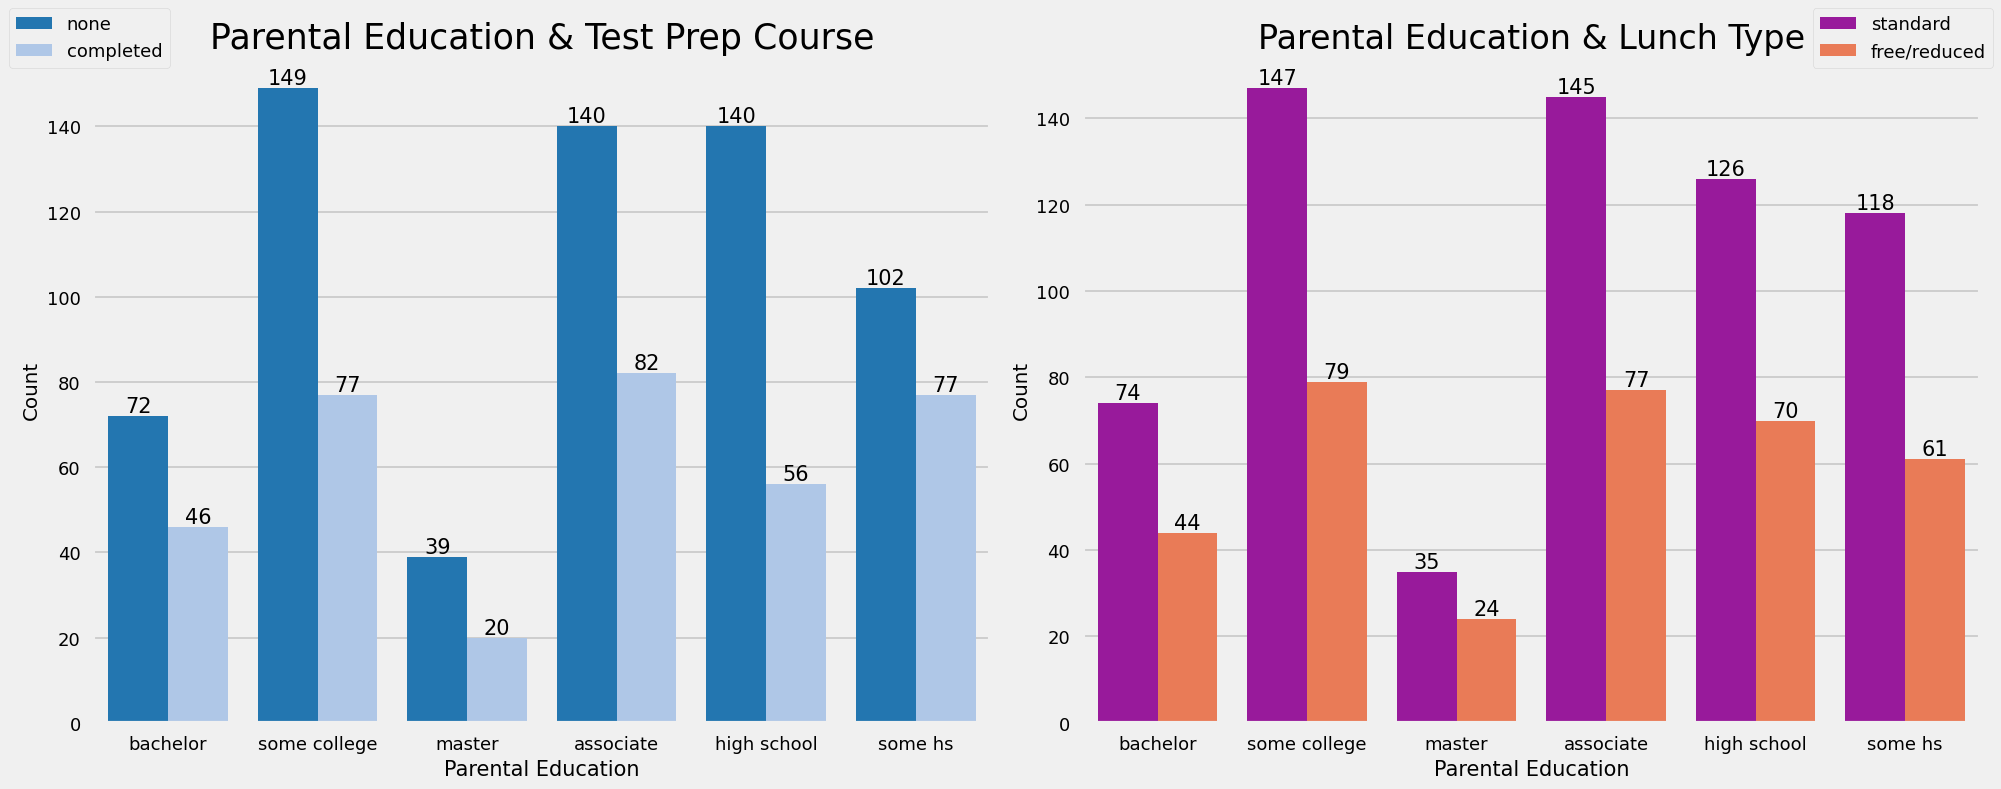

In [226]:
education_mapping = {
    'some high school': "some hs",
    'high school': "high school",
    'some college': "some college",
    "associate's degree": "associate",
    "bachelor's degree": "bachelor",
    "master's degree": "master"
}

df['education_mapped'] = df['parental_level_of_education'].map(education_mapping)

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['education_mapped'], data=df, palette = 'tab20', hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Parental Education & Test Prep Course',color='black',size=25)
ax[0].set_xlabel('Parental Education', fontsize=15)
ax[0].set_ylabel('Count')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
handles_1, labels_1 = ax[0].get_legend_handles_labels()
ax[0].legend_.remove()
    
sns.countplot(x=df['education_mapped'], data=df, palette = 'plasma', hue='lunch', saturation=0.95, ax=ax[1])
ax[1].set_title('Parental Education & Lunch Type',color='black',size=24)
ax[1].set_xlabel('Parental Education', fontsize=15)
ax[1].set_ylabel('Count')
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
handles_2, labels_2 = ax[1].get_legend_handles_labels()
ax[1].legend_.remove()

f.legend(handles_1, labels_1, loc='upper left', ncol=1, fontsize=13)
f.legend(handles_2, labels_2, loc='upper right', ncol= 1, fontsize=13)
     
plt.tight_layout()
plt.show()

#### Insights:

- Higher parental education = lower test prep participation rates
Master's degree families: Only 34% take test prep (20 vs 39 students)
Some high school families: 43% take test prep (77 vs 102 students)
- Inverse relationship suggests that families with higher education may rely more on inherent advantages rather than external test preparation

- Lower-educated families show greater test prep utilization, possibly as a compensatory strategy to bridge educational gaps

- Across all levels of parental education, a significant majority of students did not complete a test preparation course. This suggests that test prep is not the norm, regardless of parental background.

- There is a strong, clear correlation between parental education and the type of lunch students receive.

- As parental education levels increase, the number of students on a standard lunch plan rises dramatically.
- Conversely, students whose parents have a high school education or less are significantly more likely to be on a free/reduced lunch plan.
- The data strongly suggests that parental education is a key indicator of a student's socioeconomic status and, consequently, their access to resources. Higher parental education correlates with greater financial resources (standard lunch), while lower education levels correlate with a greater need for financial assistance (free/reduced lunch).

#### Multivariate Analysis using Pairplot

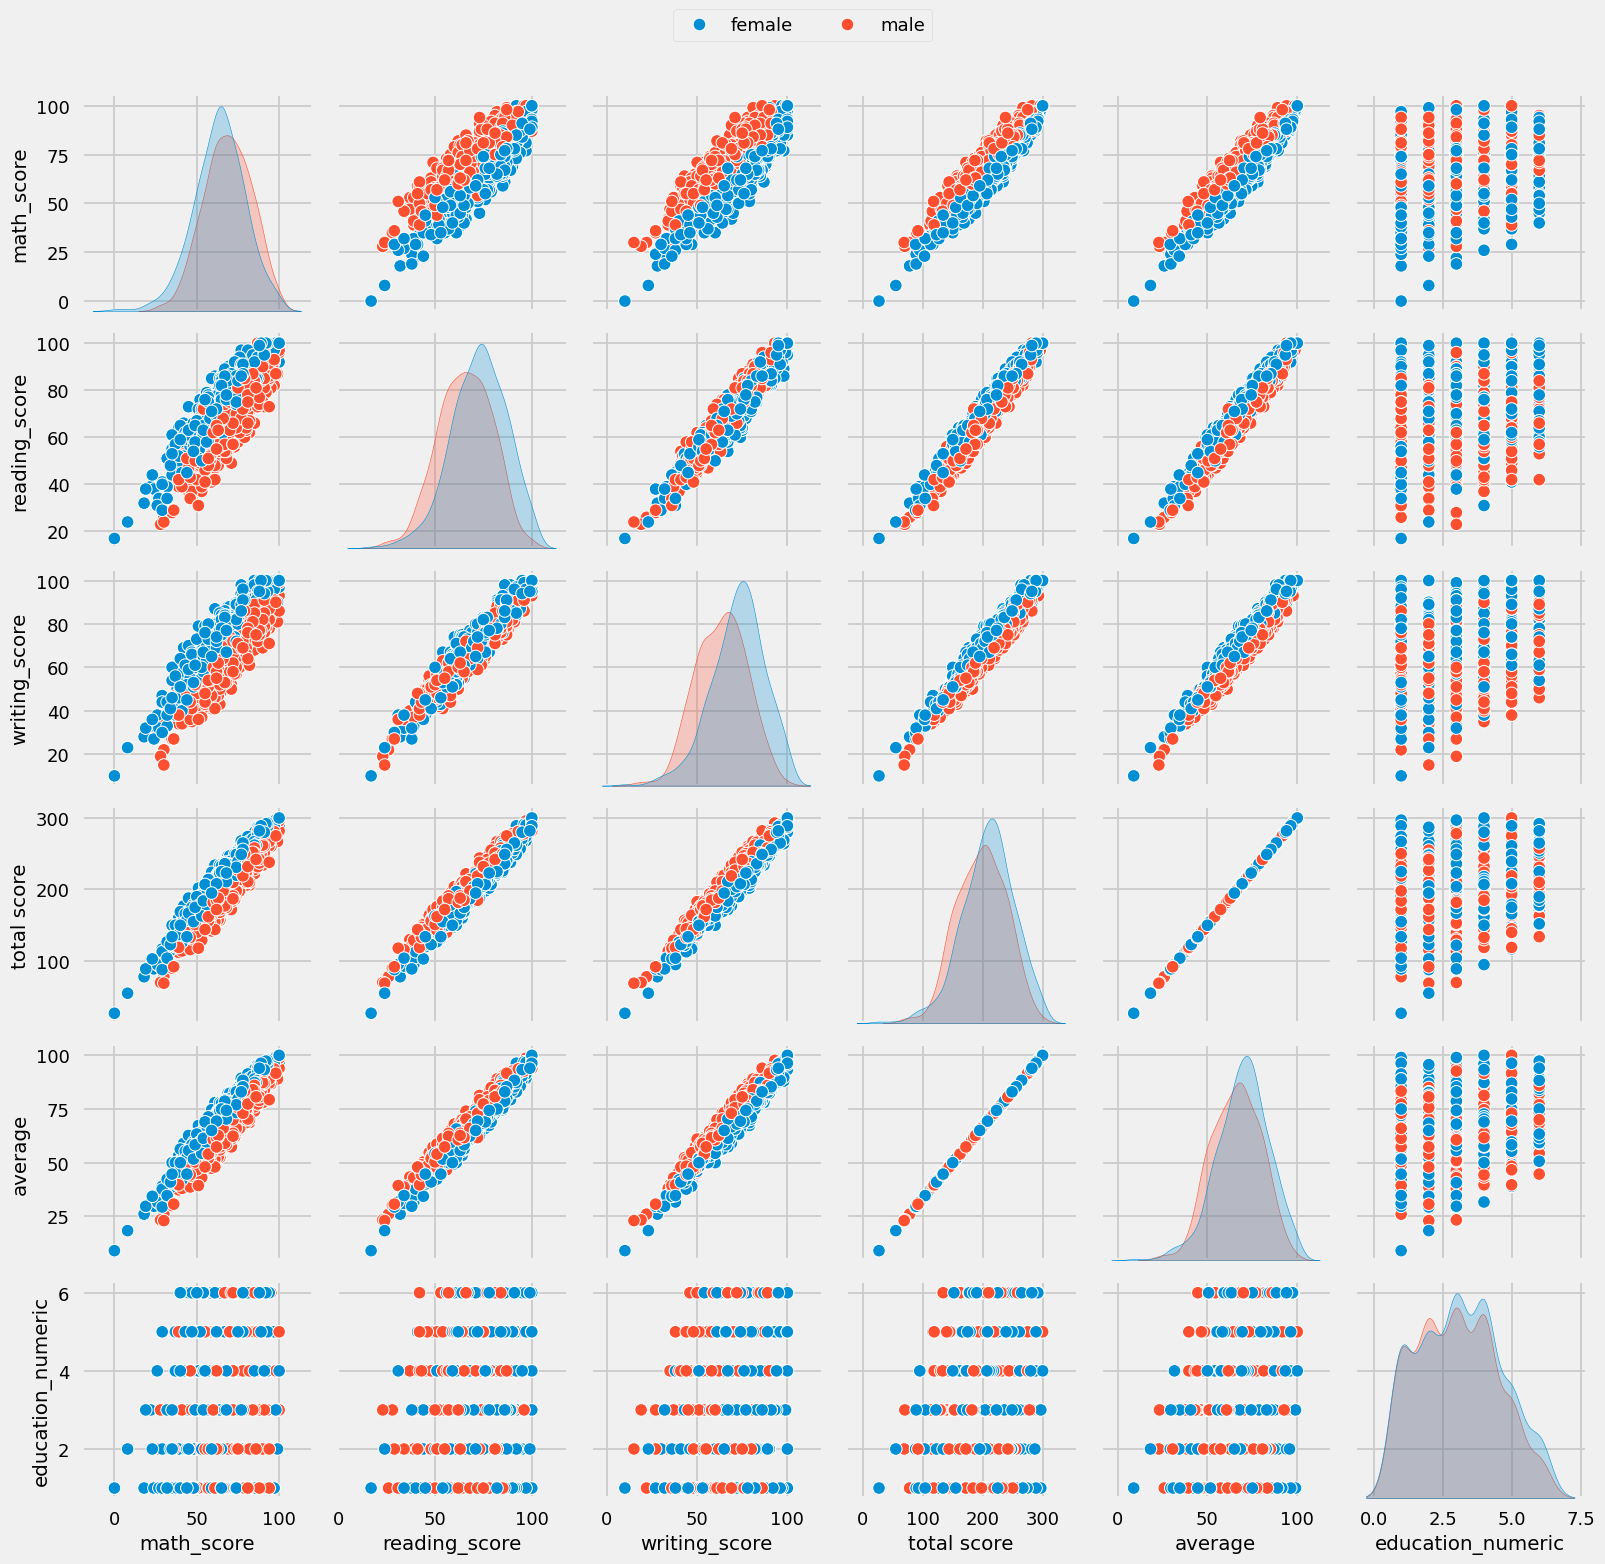

In [245]:
g = sns.pairplot(df, hue='gender')
handles, labels = g._legend_data.values(), g._legend_data.keys()
g._legend.remove()
g.fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
g.fig.subplots_adjust(top=0.92) 
plt.tight_layout()
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.
- There is a clear and strong positive linear relationship between math, reading, and writing scores which means the students who excel in one subject are very likely to perform well in the other two subjects, regardless of gender.
- Male students, on average, demonstrate an edge in math scores, as shown by the rightward shift in their score distribution.
- Conversely, female students tend to score higher in reading and writing, outperforming their male counterparts in these areas.

---

## Conclusions:

- Student's Performance is related with lunch, race, parental level education, and test preparation course

**Overall Performance:** Average scores across subjects are similar (Math: 66.1, Reading: 69.2, Writing: 68.1), with Reading being strongest subject and Math the weakest.

**Gender Differences:**
- Females outperform males overall (69.6 vs. 65.8).
- Males show strength in Math (68.7 vs. 63.6), while females excel in Reading and Writing.

**Socioeconomic Influence:**
- Students from higher socioeconomic groups (Group E) consistently score highest, while Group A performs the lowest across all subjects.
- Standard lunch students significantly outperform those on free/reduced lunch (70.8 vs. 62.2), highlighting the link between resources and achievement.

**Parental Education**
- Higher parental education strongly correlates with student performance (average 73.6 for Master’s vs. 64.3 for High School).
- Education level also predicts socioeconomic status: higher education → higher likelihood of standard lunch.
- Group-level analysis shows a strong correlation (r = 0.939), but individual variation remains substantial (r = 0.206).

**Test Preparation Impact:**
- Completing test prep provides a clear academic boost (+7.6 overall, +11.7% improvement).
- Gains are largest in Writing (+9.9), followed by Reading (+7.4) and Math (+5.6).
- Test prep effectively bridges gaps in Reading and Writing, lower-income students with prep outperform higher-income peers without prep.
- In Math, however, socioeconomic gaps persist despite preparation.

**Interconnected Skills:** Strong positive linear relationships exist between Math, Reading, and Writing, suggesting students excelling in one subject tend to perform well in others.

**Equity Insight:**
- Students from less advantaged backgrounds benefit most from test preparation, especially in language-based subjects.
- However, unequal access to resources (lunch type, parental education) continues to drive performance gaps, emphasizing systemic disparities.

---

## Author:

- [Parshv Patel](#https://www.linkedin.com/in/parshv-patel-65a90326b/)